# Initializing

Importing Files from Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # To access gdrive files

Mounted at /content/drive


Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Initializing Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/TokopediaCleanedStemmedFIXED.csv')

Dataset Information

In [ ]:
def check_dataset_information():
  print('Total reviews: ' + str(len(dataset)))
  print('Dataset Columns: ')
  for columns in  dataset.columns:
    print('- ' + columns)
  print('Number of NULL dataset: ')
  print(str(dataset.isnull().sum()))
  print(dataset['Sentiment'].value_counts())

In [ ]:
check_dataset_information()

Total reviews: 5400
Dataset Columns: 
- Unnamed: 0
- Unnamed: 0.1
- Review
- Sentiment
Number of NULL dataset: 
Unnamed: 0      0
Unnamed: 0.1    0
Review          0
Sentiment       0
dtype: int64
Negative    2820
Positive    2580
Name: Sentiment, dtype: int64


Removing Unnecessary Columns

In [ ]:
useless_columns = ['Unnamed: 0', 'Unnamed: 0.1']
dataset = dataset.drop(useless_columns, 1)
check_dataset_information()

Total reviews: 5400
Dataset Columns: 
- Review
- Sentiment
Number of NULL dataset: 
Review       0
Sentiment    0
dtype: int64
Negative    2820
Positive    2580
Name: Sentiment, dtype: int64


# TF-IDF = Term Frequency–Inverse Document Frequency 

In [ ]:
# Initializing the vectorizer
vectorizer = TfidfVectorizer(analyzer='word', max_features=None, ngram_range=(1,1))   # ngram_range 1,1 = max only one word

Fitting our corpus into the vectorizer

In [ ]:
corpus = dataset['Review'].astype('str')

x = vectorizer.fit_transform(corpus)
y = dataset.Sentiment.astype(str)

Checking the shape

In [ ]:
x.get_shape()

# 5400 = total reviews
# 6016 = total corpus / unique words

(5400, 6016)

In [ ]:
print(x)

  (0, 148)	0.41831194635355934
  (0, 2917)	0.36005271972160546
  (0, 4933)	0.24450702499899976
  (0, 4465)	0.32417697106404547
  (0, 1009)	0.20125437717688108
  (0, 4631)	0.26497048509286414
  (0, 146)	0.2616340183945026
  (0, 3963)	0.3284604713456712
  (0, 1842)	0.2869229705437675
  (0, 123)	0.40140583773796096
  (1, 4749)	0.7250565884534412
  (1, 2108)	0.3717316400133428
  (1, 343)	0.30583975041050415
  (1, 1009)	0.297896712376091
  (1, 4631)	0.39220929001950533
  (2, 2758)	0.23133538229504894
  (2, 4925)	0.6823690399663865
  (2, 343)	0.27542835039451724
  (2, 4465)	0.4321328143462051
  (2, 1009)	0.26827513417588345
  (2, 1842)	0.3824726671813955
  (3, 3008)	0.5913474699752201
  (3, 2563)	0.25088586384910266
  (3, 5512)	0.2493175760008234
  (3, 2458)	0.2999948880970615
  :	:
  (5397, 912)	0.29063240867430107
  (5397, 2995)	0.3400079071777807
  (5397, 5834)	0.3919504932828428
  (5397, 1657)	0.30856353204845577
  (5397, 4925)	0.40126523189983293
  (5397, 4631)	0.2077039731044365
  (539

Split the dataset (train = 80: test = 20)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=.2, random_state=100, stratify=y)

print('train shape = ' + str(x_train.get_shape()))
print('train sentiment = ')
print(str(y_train.value_counts()))

print()

print('test shape = ' + str(x_test.get_shape()))
print('test sentiment = ')
print(str(y_test.value_counts()))

train shape = (4320, 6016)
train sentiment = 
Negative    2256
Positive    2064
Name: Sentiment, dtype: int64

test shape = (1080, 6016)
test sentiment = 
Negative    564
Positive    516
Name: Sentiment, dtype: int64


# Logistic Regression

Initializing and fitting training dataset

In [ ]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf.score(x_train, y_train)

0.9335648148148148

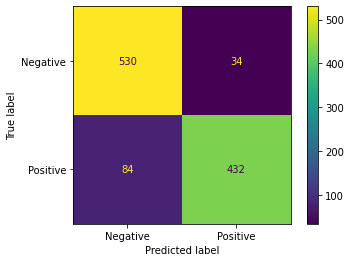

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

Checking the accuracy on the test dataset

In [ ]:
tfidf_result = clf.predict(x_test)
print(classification_report(y_test, tfidf_result))

              precision    recall  f1-score   support

    Negative       0.86      0.94      0.90       564
    Positive       0.93      0.84      0.88       516

    accuracy                           0.89      1080
   macro avg       0.90      0.89      0.89      1080
weighted avg       0.89      0.89      0.89      1080



# SVM - Support Vector Machine

In [ ]:
svc = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
svc.fit(x_train, y_train)
svc.score(x_train, y_train)

0.9740740740740741

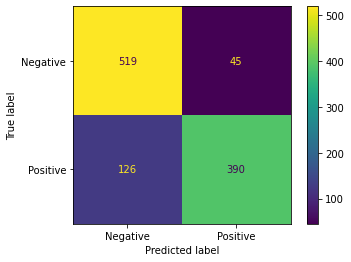

In [ ]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()

In [ ]:
svc_result = svc.predict(x_test)
print(classification_report(y_test, svc_result))

              precision    recall  f1-score   support

    Negative       0.80      0.92      0.86       564
    Positive       0.90      0.76      0.82       516

    accuracy                           0.84      1080
   macro avg       0.85      0.84      0.84      1080
weighted avg       0.85      0.84      0.84      1080

